In [1]:
from keras.models import Model , Sequential
from keras.layers import GlobalAveragePooling2D , Dropout , Dense , Activation
from keras.layers import Conv2D , BatchNormalization , Flatten , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import cv2
import numpy as np
from keras.preprocessing import image_dataset_from_directory

In [9]:
model = Sequential()

model.add(Conv2D(input_shape = (120,90,3), filters = 32, kernel_size = (3,3), strides = (1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

adam = Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 118, 88, 32)       896       
_________________________________________________________________
activation_5 (Activation)    (None, 118, 88, 32)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 59, 44, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 57, 42, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 57, 42, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 21, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 19, 16)       

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.5,
                                   zoom_range=[0.8, 2.0],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [11]:
save_path = 'C:/mask_data/'

In [14]:
save_path = 'C:/mask_data/'

train_generator = train_datagen.flow_from_directory(save_path+'train/',
                                                  batch_size=10,
                                                    target_size=(120,90),
                                                  class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(save_path+'test/',
                                                      batch_size=10,
                                                        target_size=(120,90),
                                                      class_mode='categorical')

Found 2800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [15]:
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=280,
  epochs=50,
  validation_steps=120
)

Epoch 1/50
280/280 [==============================] - 50s 178ms/step - loss: 0.5284 - accuracy: 0.7964 - val_loss: 0.2042 - val_accuracy: 0.9333
Epoch 2/50
280/280 [==============================] - 48s 173ms/step - loss: 0.2967 - accuracy: 0.8989 - val_loss: 0.3162 - val_accuracy: 0.9050
Epoch 3/50
280/280 [==============================] - 50s 178ms/step - loss: 0.2492 - accuracy: 0.9157 - val_loss: 0.1334 - val_accuracy: 0.9792
Epoch 4/50
280/280 [==============================] - 49s 174ms/step - loss: 0.2098 - accuracy: 0.9354 - val_loss: 0.1396 - val_accuracy: 0.9650
Epoch 5/50
280/280 [==============================] - 48s 173ms/step - loss: 0.1839 - accuracy: 0.9379 - val_loss: 0.1675 - val_accuracy: 0.9300
Epoch 6/50
280/280 [==============================] - 49s 175ms/step - loss: 0.1666 - accuracy: 0.9457 - val_loss: 0.0827 - val_accuracy: 0.9783
Epoch 7/50
280/280 [==============================] - 48s 173ms/step - loss: 0.1667 - accuracy: 0.9468 - val_loss: 0.1031 - val_ac

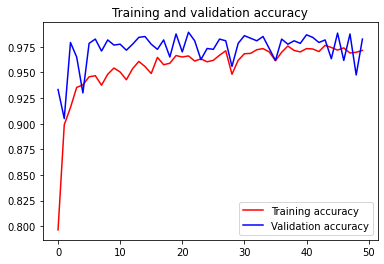

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [17]:
from keras.models import load_model

model.save('from_basic.h5')

In [ ]:
testt=image_dataset_from_directory(
    save_path+'test/',
    labels="inferred",
    label_mode="int",
    class_names=['chin_mask', 'full_mask', 'no_mask', 'nose_mask'],
    color_mode="rgb",
    batch_size=10,
    shuffle=False,
    seed=1120
)

In [ ]:
type(testt)

In [ ]:
testt.shape

In [ ]:
dir(tensorflow.python.data.ops.dataset_ops.BatchDataset)